In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy.io
def morsetrans(x,K,ga,be,method='bandwidth' ):
    filename='../morse_g{:.2f}_b{:.2f}_{}.mat'.format(ga,be,method)
    W=scipy.io.loadmat(filename)['W']
    assert(K<5)
    W=W[:,:,K]
    print filename,W.shape,W.dtype,np.sum(W)
    X=np.fft.fft(x)
    print X.shape,X.dtype ,X.sum()
    print np.sum(X.reshape([-1,1])*W)
    return np.fft.ifft( X.reshape([-1,1])*W,axis=0).T;

In [3]:
#morsewave(16000, 3, 2,fs,method='bandpass')

In [4]:
import soundfile  
filename='/home/bo/mydev/tsrc2017/input/train/audio/happy/0132a06d_nohash_0.wav'
x,_=soundfile.read(filename)
x.shape

(16000,)

In [5]:
len(x),sum(x)

(16000, 0.74755859375)

<IPython.core.display.Javascript object>


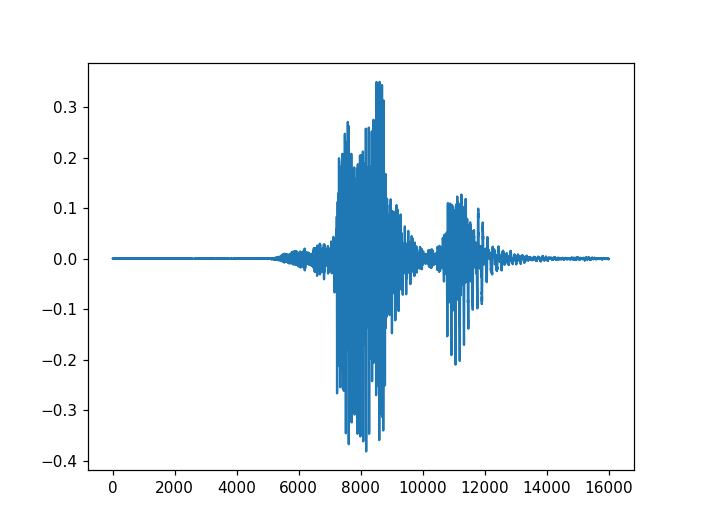

In [16]:
plt.figure(),plot(x);plt.show()

../morse_g3.00_b7.00_bandwidth.mat (16000, 119) float64 113872.08846
(16000,) complex128 (1.02917674383e-13-1.92734717075e-13j)
(-10.8111378011-116.784861124j)
(119, 16000)


<IPython.core.display.Javascript object>


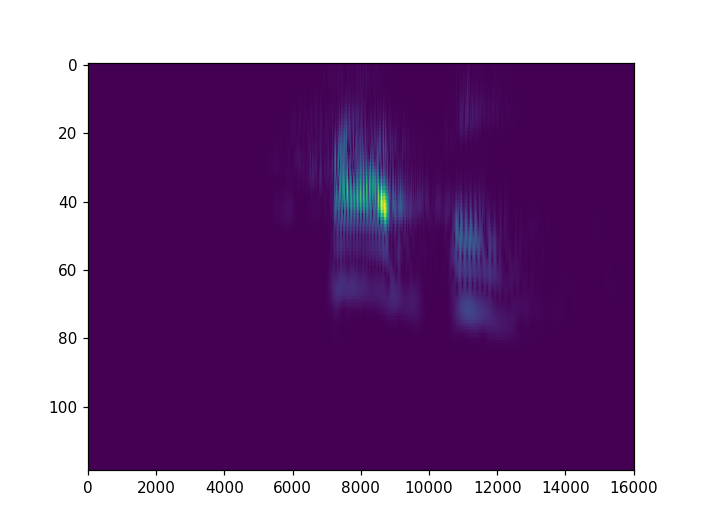

../morse_g3.00_b7.00_bandwidth.mat (16000, 119) float64 -16215.7184962
(16000,) complex128 (1.02917674383e-13-1.92734717075e-13j)
(-5.96433519462-19.384630142j)
(119, 16000)


<IPython.core.display.Javascript object>

../morse_g3.00_b7.00_bandwidth.mat (16000, 119) float64 72659.6691322
(16000,) complex128 (1.02917674383e-13-1.92734717075e-13j)
(-5.89254344213-79.8723428786j)
(119, 16000)


<IPython.core.display.Javascript object>


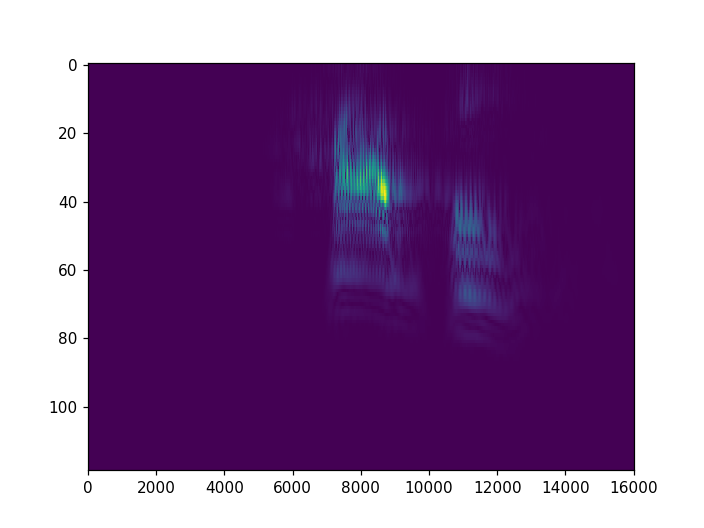

(119, 16000)


In [71]:
lst=[]
lst2=[]

for K in range(3):
    a=morsetrans(x,K, 3,7)
    lst.append(a)
    b=np.log1p(np.abs(a))
    print b.shape
    plt.figure();imshow(b,aspect='auto');plt.show()
    lst2.append(b)
a=np.sum(lst,0)
b=np.log1p(np.abs(a))
print b.shape
imshow(b,aspect='auto');plt.show()


In [17]:
 np.sort(b.reshape([-1]))[-100:].mean()

0.47745904370643755

<IPython.core.display.Javascript object>


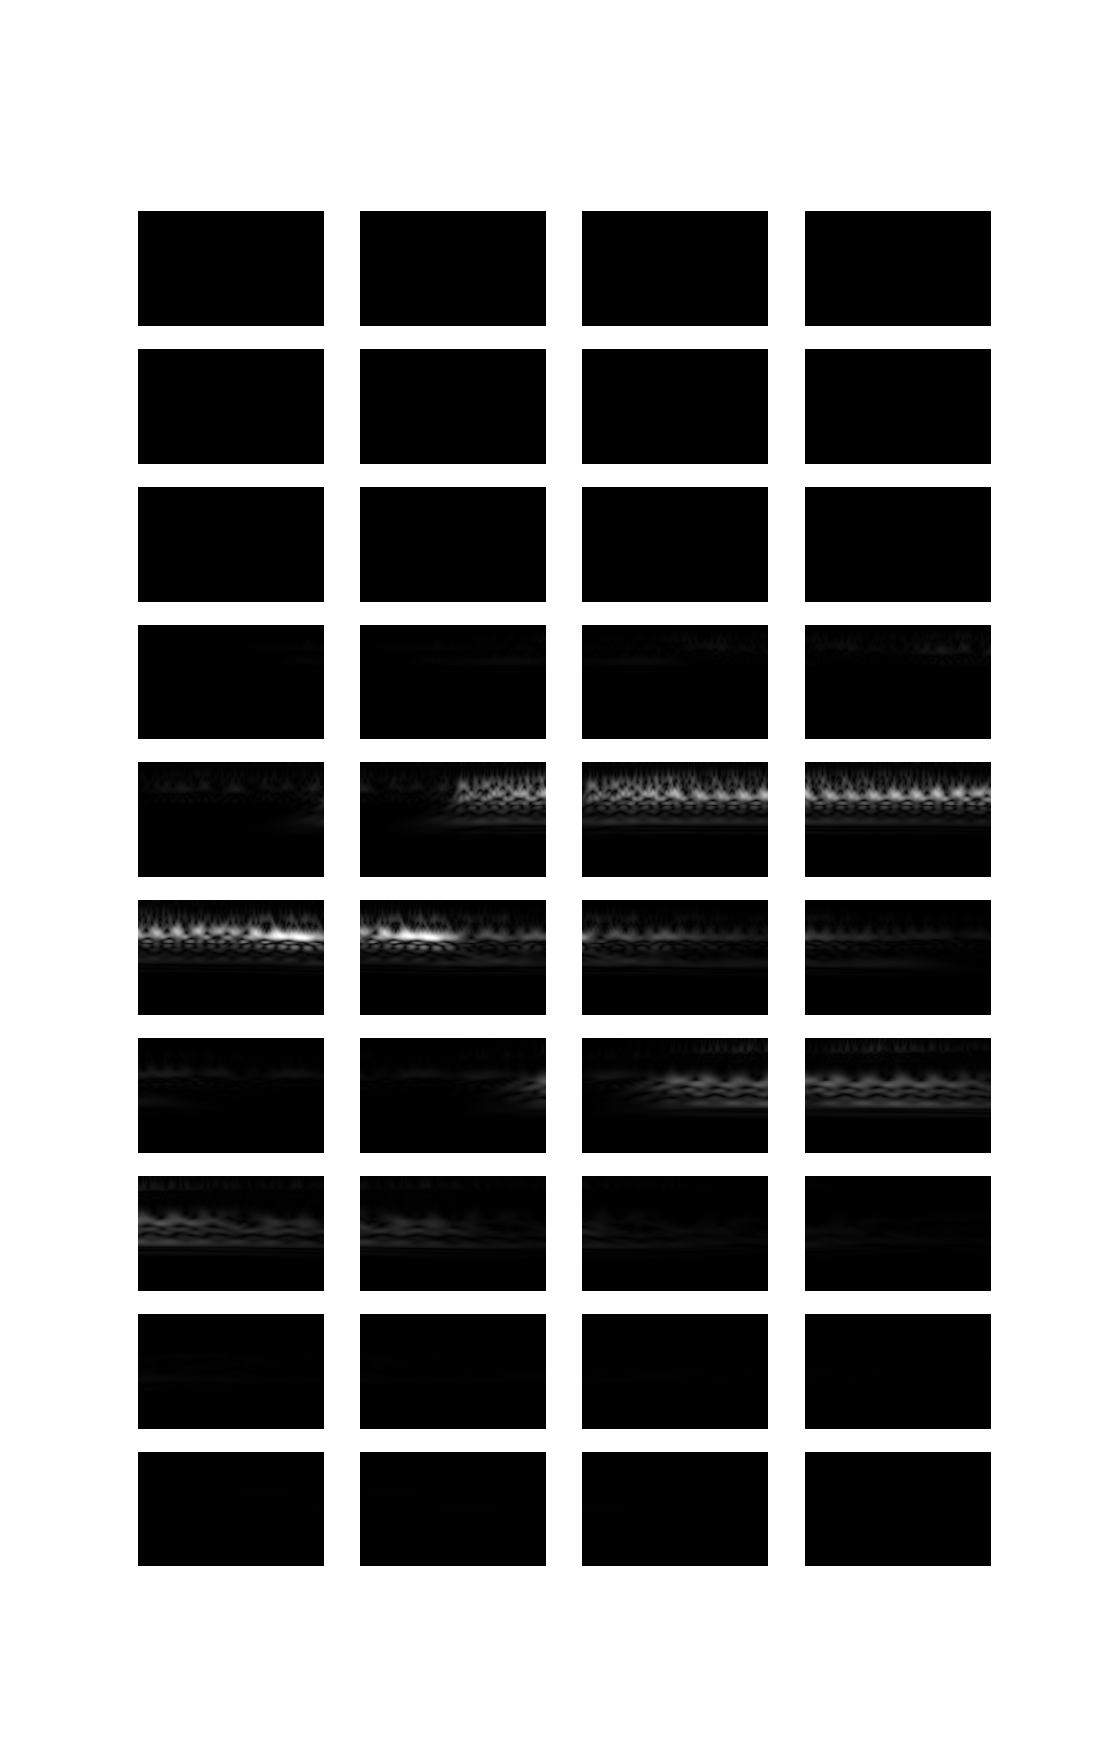

9.07741194521e-05 7.19509565746e-05
0 0 1 1
9.3047389194e-05 8.08605717794e-05
0 0 1 2
0.000102814634314 8.80011574154e-05
0 0 1 3
9.18116300077e-05 7.87211221658e-05
0 0 1 4
8.46531715441e-05 7.33744126623e-05
0 0 2 1
8.37972350767e-05 7.23376333087e-05
0 0 2 2
7.9231733658e-05 6.98098902601e-05
0 0 2 3
6.7608281809e-05 6.11730878084e-05
0 0 2 4
6.29122891665e-05 5.7439439847e-05
0 0 3 1
7.10228955039e-05 6.85053679311e-05
0 0 3 2
8.3489227375e-05 7.97403441752e-05
0 0 3 3
0.000124650639741 0.000180156301707
0 1 3 4
0.000531204605233 0.00132577816159
0 5 4 1
0.00154314996107 0.00296801942813
0 11 4 2
0.00228467228994 0.00399238512471
0 16 4 3
0.00314527928034 0.00592165210711
0 25 4 4
0.00540090120617 0.00863431431442
0 37 5 1
0.0246497541191 0.0454307096219
0 182 5 2
0.0425604772135 0.0608296481896
0 188 5 3
0.0419128584107 0.0648019484971
0 188 5 4
0.0459041774038 0.078780552863
0 255 6 1
0.0365674425373 0.0688414378434
0 255 6 2
0.0173081509965 0.0272703251378
0 144 6 3
0.009066008

In [39]:
plt.figure(figsize=(10,16))
M2=400
for i in range(16000/M2):
    bb=b[:,i*M2:(i+1)*M2+M2]
    print bb.mean(),bb.std()
    bb=255*(bb/0.47745904370643755)
    bb[bb>255]=255
    bb=bb.astype(np.uint8)
    print bb.min(),bb.max(),i//4+1,i%4+1
    subplt=plt.subplot(10,4,i+1)
    imshow(bb,aspect='auto',cmap='gray',vmax=255)#;plt.show()
    subplt.axis('off')
plt.show()

In [61]:
from skimage.transform import resize
from PIL import Image
import PIL

In [59]:
a=Image.fromarray(bb)
print a.size
a=a.resize((119, 119))
a.size

(400, 119)


(119, 119)

<IPython.core.display.Javascript object>


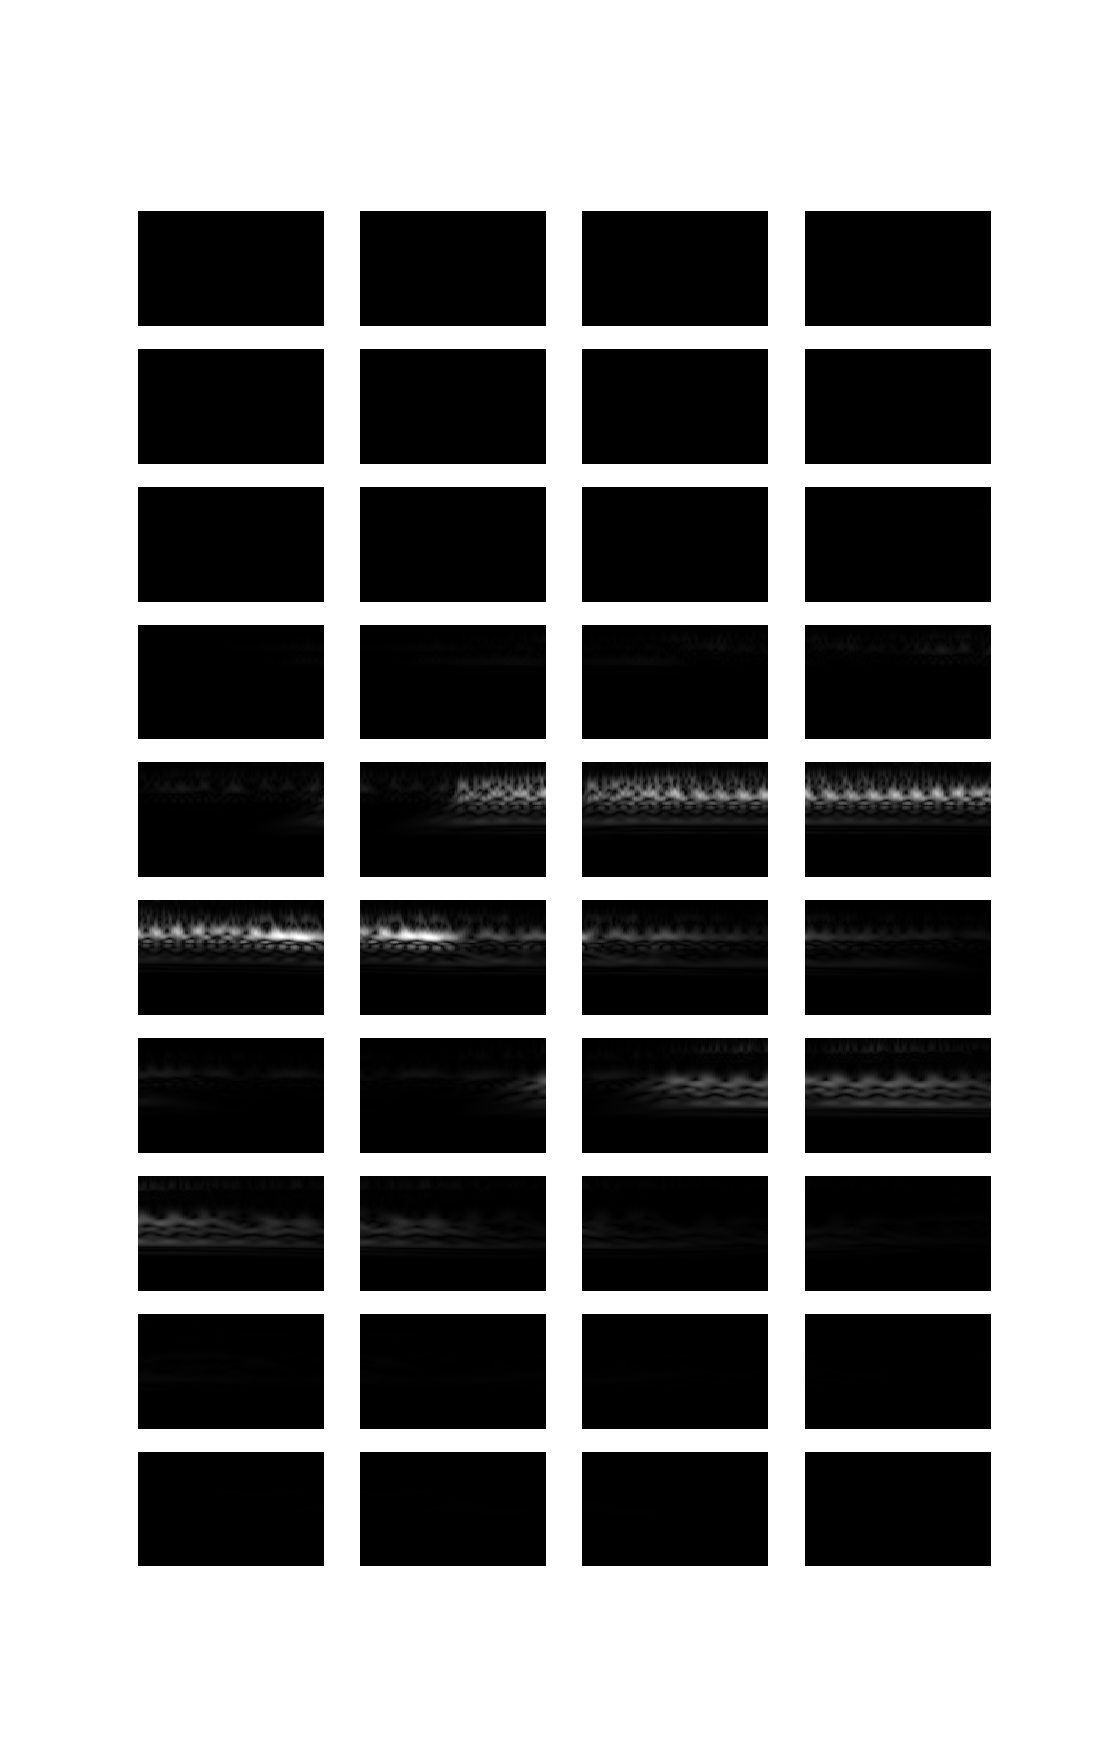

9.07741194521e-05 7.19509565746e-05
0 0 1 1
(119, 119)
9.3047389194e-05 8.08605717794e-05
0 0 1 2
(119, 119)
0.000102814634314 8.80011574154e-05
0 0 1 3
(119, 119)
9.18116300077e-05 7.87211221658e-05
0 0 1 4
(119, 119)
8.46531715441e-05 7.33744126623e-05
0 0 2 1
(119, 119)
8.37972350767e-05 7.23376333087e-05
0 0 2 2
(119, 119)
7.9231733658e-05 6.98098902601e-05
0 0 2 3
(119, 119)
6.7608281809e-05 6.11730878084e-05
0 0 2 4
(119, 119)
6.29122891665e-05 5.7439439847e-05
0 0 3 1
(119, 119)
7.10228955039e-05 6.85053679311e-05
0 0 3 2
(119, 119)
8.3489227375e-05 7.97403441752e-05
0 0 3 3
(119, 119)
0.000124650639741 0.000180156301707
0 1 3 4
(119, 119)
0.000531204605233 0.00132577816159
0 5 4 1
(119, 119)
0.00154314996107 0.00296801942813
0 11 4 2
(119, 119)
0.00228467228994 0.00399238512471
0 16 4 3
(119, 119)
0.00314527928034 0.00592165210711
0 25 4 4
(119, 119)
0.00540090120617 0.00863431431442
0 37 5 1
(119, 119)
0.0246497541191 0.0454307096219
0 182 5 2
(119, 119)
0.0425604772135 0.0608

In [62]:
plt.figure(figsize=(10,16))
M2=400
for i in range(16000/M2):
    bb=b[:,i*M2:(i+1)*M2+M2]
    print bb.mean(),bb.std()
    bb=255*(bb/0.47745904370643755)
    bb[bb>255]=255
    bb=bb.astype(np.uint8)
    print bb.min(),bb.max(),i//4+1,i%4+1

    bb=Image.fromarray(bb)
    bb=bb.resize((119, 119),PIL.Image.LANCZOS)
    print bb.size
    subplt=plt.subplot(10,4,i+1)
    imshow(bb,aspect='auto',cmap='gray',vmax=255)#;plt.show()
    subplt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


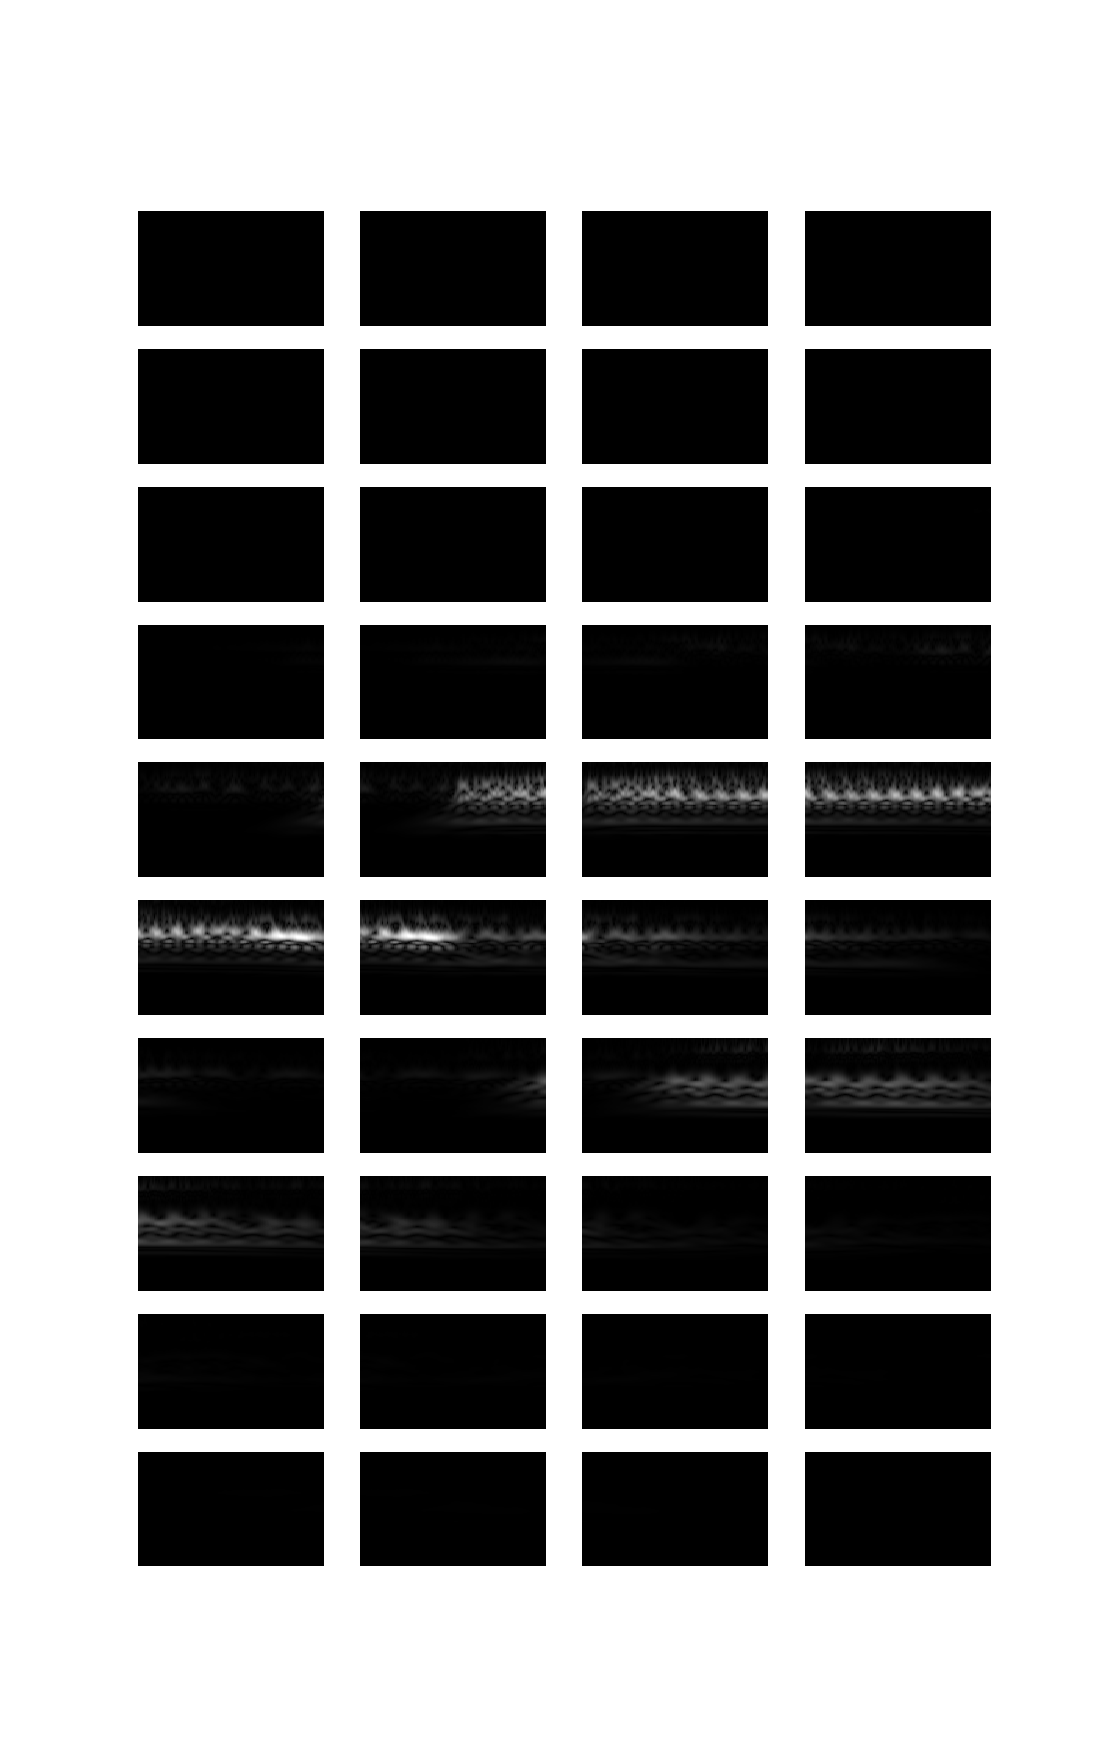

9.07741194521e-05 7.19509565746e-05
0 0 1 1
(119, 119)
9.3047389194e-05 8.08605717794e-05
0 0 1 2
(119, 119)
0.000102814634314 8.80011574154e-05
0 0 1 3
(119, 119)
9.18116300077e-05 7.87211221658e-05
0 0 1 4
(119, 119)
8.46531715441e-05 7.33744126623e-05
0 0 2 1
(119, 119)
8.37972350767e-05 7.23376333087e-05
0 0 2 2
(119, 119)
7.9231733658e-05 6.98098902601e-05
0 0 2 3
(119, 119)
6.7608281809e-05 6.11730878084e-05
0 0 2 4
(119, 119)
6.29122891665e-05 5.7439439847e-05
0 0 3 1
(119, 119)
7.10228955039e-05 6.85053679311e-05
0 0 3 2
(119, 119)
8.3489227375e-05 7.97403441752e-05
0 0 3 3
(119, 119)
0.000124650639741 0.000180156301707
0 1 3 4
(119, 119)
0.000531204605233 0.00132577816159
0 5 4 1
(119, 119)
0.00154314996107 0.00296801942813
0 11 4 2
(119, 119)
0.00228467228994 0.00399238512471
0 16 4 3
(119, 119)
0.00314527928034 0.00592165210711
0 25 4 4
(119, 119)
0.00540090120617 0.00863431431442
0 37 5 1
(119, 119)
0.0246497541191 0.0454307096219
0 182 5 2
(119, 119)
0.0425604772135 0.0608

In [60]:
plt.figure(figsize=(10,16))
M2=400
for i in range(16000/M2):
    bb=b[:,i*M2:(i+1)*M2+M2]
    print bb.mean(),bb.std()
    bb=255*(bb/0.47745904370643755)
    bb[bb>255]=255
    bb=bb.astype(np.uint8)
    print bb.min(),bb.max(),i//4+1,i%4+1

    bb=Image.fromarray(bb)
    bb=bb.resize((119, 119),PIL.Image.LANCZOS)
    print bb.size
    subplt=plt.subplot(10,4,i+1)
    imshow(bb,aspect='auto',cmap='gray',vmax=255)#;plt.show()
    subplt.axis('off')
plt.show()

0.27526026995866587

<IPython.core.display.Javascript object>


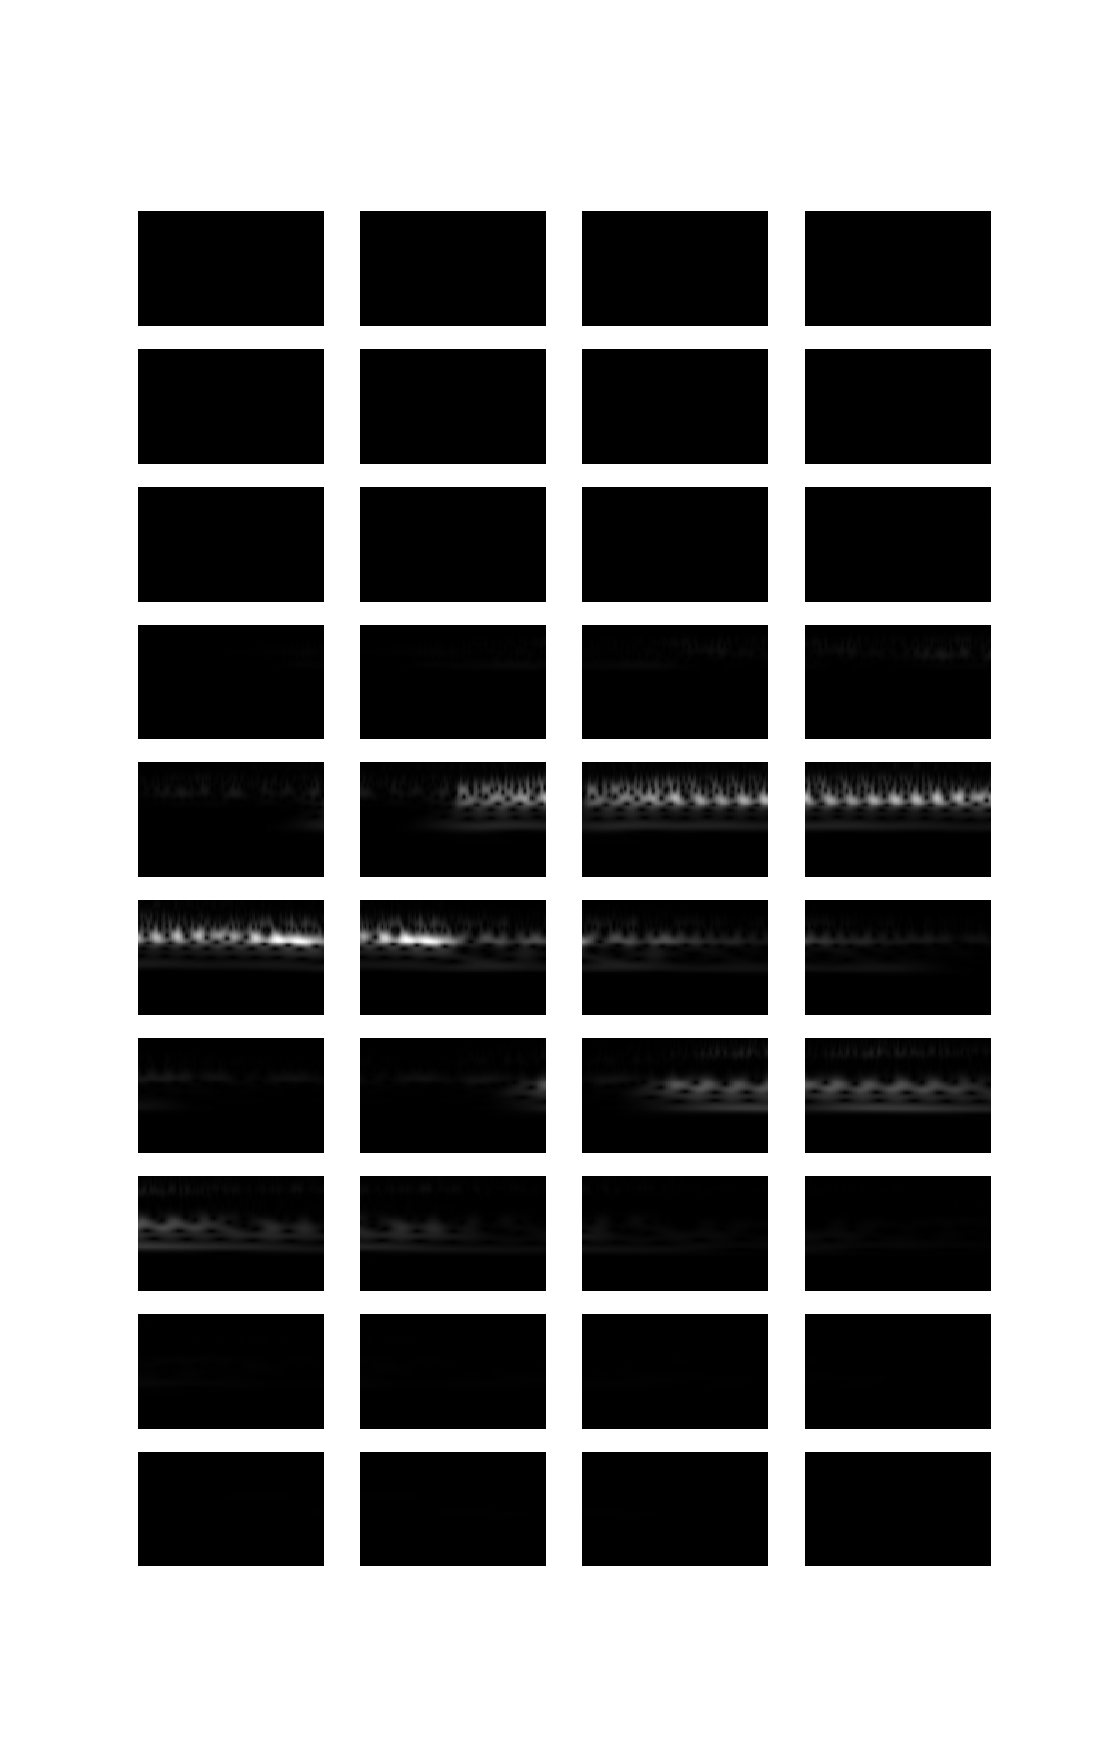

4.70165135675e-05 3.51738618665e-05
0 0 1 1
(119, 119)
4.88373225331e-05 4.28501419914e-05
0 0 1 2
(119, 119)
5.4297141782e-05 4.64037654851e-05
0 0 1 3
(119, 119)
4.83755020421e-05 4.10586121909e-05
0 0 1 4
(119, 119)
4.4854046835e-05 3.80748997112e-05
0 0 2 1
(119, 119)
4.48201011536e-05 3.77507005549e-05
0 0 2 2
(119, 119)
4.23507829742e-05 3.64895688738e-05
0 0 2 3
(119, 119)
3.61452048613e-05 3.20920501492e-05
0 0 2 4
(119, 119)
3.39521384391e-05 3.0116644889e-05
0 0 3 1
(119, 119)
3.79598862512e-05 3.5960583091e-05
0 0 3 2
(119, 119)
4.4054853406e-05 4.21240106278e-05
0 0 3 3
(119, 119)
6.5536366181e-05 9.40596060928e-05
0 1 3 4
(119, 119)
0.000275576034129 0.000692963339485
0 5 4 1
(119, 119)
0.00079474801069 0.00156447311356
0 9 4 2
(119, 119)
0.00117260098308 0.00210717230638
0 13 4 3
(119, 119)
0.0016282838719 0.00311125252472
0 22 4 4
(119, 119)
0.00270105554749 0.00440545208142
0 27 5 1
(119, 119)
0.0131491126437 0.0247466753927
0 177 5 2
(119, 119)
0.02283035167 0.03348015

In [72]:
plt.figure(figsize=(10,16))
M2=400
b=lst2[0]
for i in range(16000/M2):
    bb=b[:,i*M2:(i+1)*M2+M2]
    print bb.mean(),bb.std()
    norm=np.max(b)
    bb=255*(bb/norm)
    bb[bb>255]=255
    bb=bb.astype(np.uint8)
    print bb.min(),bb.max(),i//4+1,i%4+1

    bb=Image.fromarray(bb)
    bb=bb.resize((119, 119),PIL.Image.LANCZOS)
    print bb.size
    subplt=plt.subplot(10,4,i+1)
    imshow(bb,aspect='auto',cmap='gray',vmax=255)#;plt.show()
    subplt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


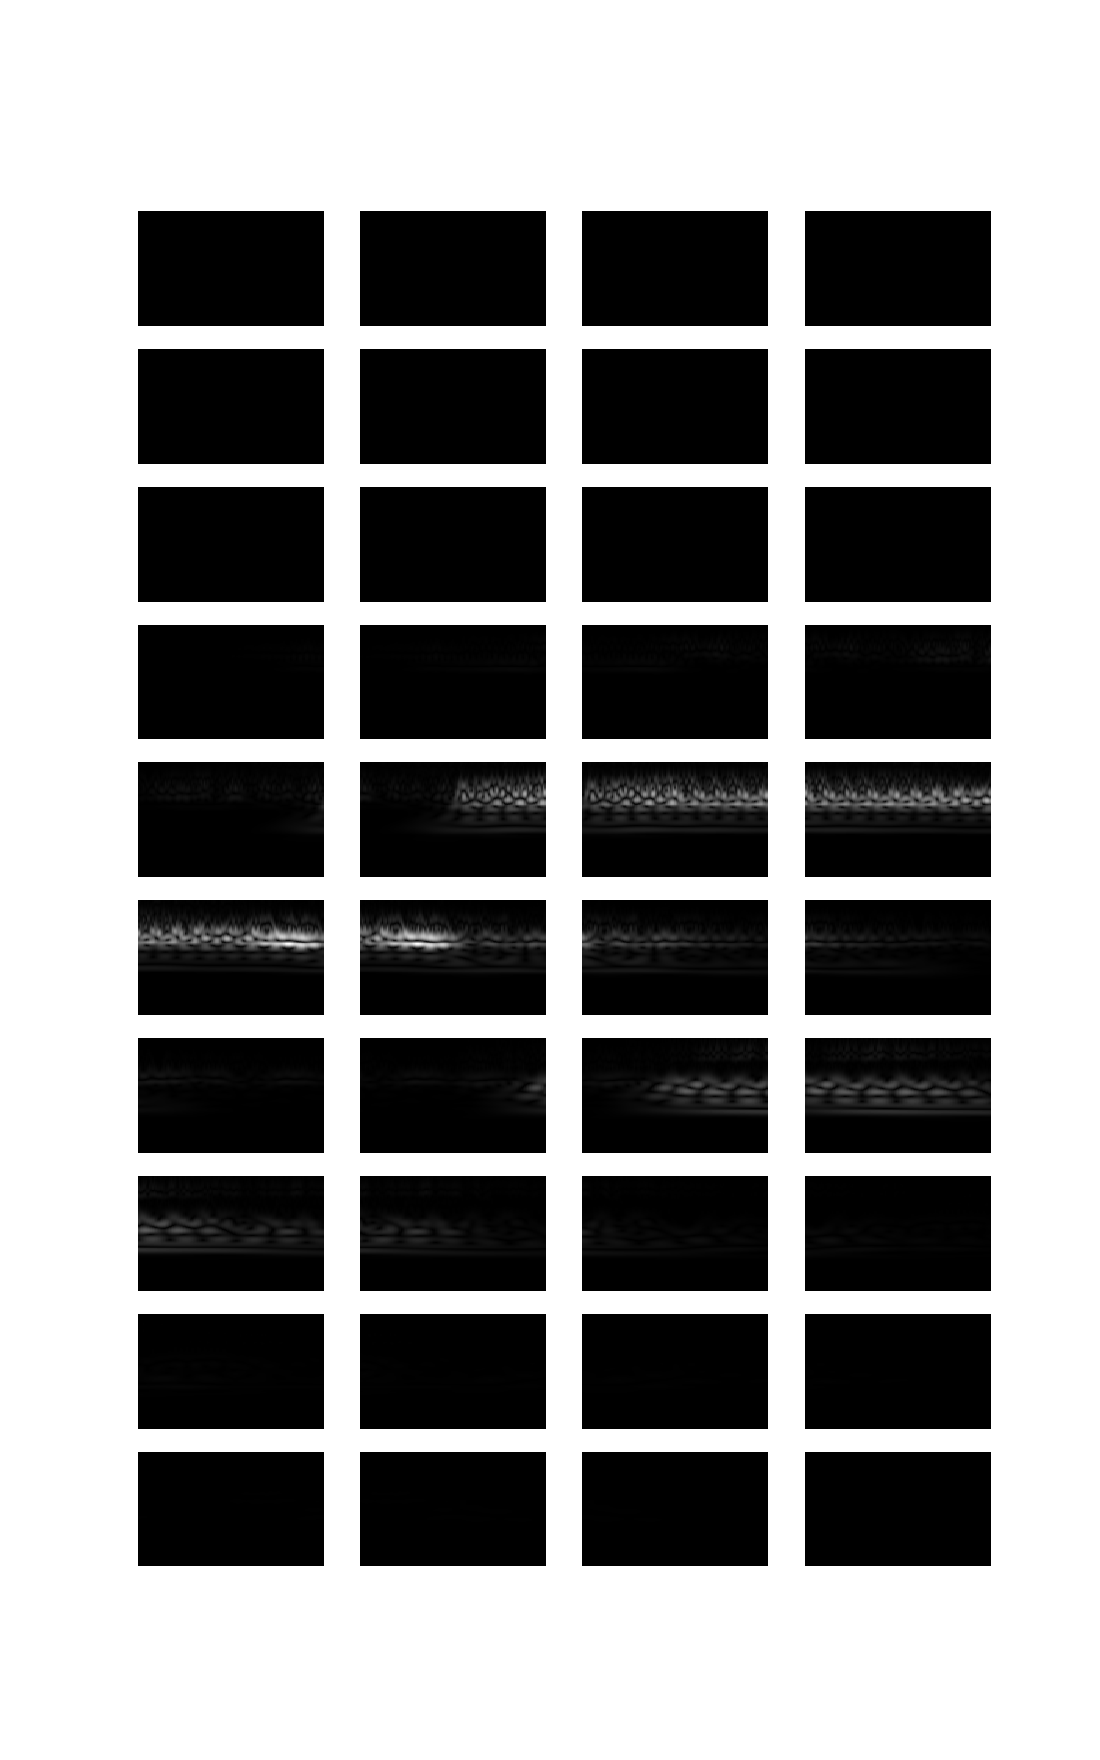

4.93803799483e-05 3.79799911022e-05
0 0 1 1
(119, 119)
5.02139156789e-05 3.85200813107e-05
0 0 1 2
(119, 119)
5.44641056914e-05 4.28945610989e-05
0 0 1 3
(119, 119)
4.87742074477e-05 3.95347803717e-05
0 0 1 4
(119, 119)
4.49098201026e-05 3.68102649537e-05
0 0 2 1
(119, 119)
4.4125261141e-05 3.58251059212e-05
0 0 2 2
(119, 119)
4.188513848e-05 3.43902904011e-05
0 0 2 3
(119, 119)
3.66115973745e-05 3.02175100854e-05
0 0 2 4
(119, 119)
3.40245044892e-05 2.85290108084e-05
0 0 3 1
(119, 119)
3.83266756891e-05 3.39931002432e-05
0 0 3 2
(119, 119)
4.49049567404e-05 3.92330687365e-05
0 0 3 3
(119, 119)
6.64485886495e-05 8.9472676923e-05
0 0 3 4
(119, 119)
0.000283596013749 0.00067130911765
0 6 4 1
(119, 119)
0.000812437872996 0.00150731720345
0 8 4 2
(119, 119)
0.00120799461206 0.00202362883504
0 16 4 3
(119, 119)
0.00169383713863 0.00301675685166
0 20 4 4
(119, 119)
0.00296661161498 0.00457093428885
0 44 5 1
(119, 119)
0.0133823755517 0.0241943814409
0 162 5 2
(119, 119)
0.0232521847879 0.032

In [73]:
plt.figure(figsize=(10,16))
M2=400
b=lst2[1]
for i in range(16000/M2):
    bb=b[:,i*M2:(i+1)*M2+M2]
    print bb.mean(),bb.std()
    norm=np.max(b)
    bb=255*(bb/norm)
    bb[bb>255]=255
    bb=bb.astype(np.uint8)
    print bb.min(),bb.max(),i//4+1,i%4+1

    bb=Image.fromarray(bb)
    bb=bb.resize((119, 119),PIL.Image.LANCZOS)
    print bb.size
    subplt=plt.subplot(10,4,i+1)
    imshow(bb,aspect='auto',cmap='gray',vmax=255)#;plt.show()
    subplt.axis('off')
plt.show()

In [74]:
plt.figure(figsize=(10,16))
M2=400
b=lst2[2]
for i in range(16000/M2):
    bb=b[:,i*M2:(i+1)*M2+M2]
    print bb.mean(),bb.std()
    norm=np.max(b)
    bb=255*(bb/norm)
    bb[bb>255]=255
    bb=bb.astype(np.uint8)
    print bb.min(),bb.max(),i//4+1,i%4+1

    bb=Image.fromarray(bb)
    bb=bb.resize((119, 119),PIL.Image.LANCZOS)
    print bb.size
    subplt=plt.subplot(10,4,i+1)
    imshow(bb,aspect='auto',cmap='gray',vmax=255)#;plt.show()
    subplt.axis('off')
plt.show()

<IPython.core.display.Javascript object>

5.04843292573e-05 4.13308041837e-05
0 0 1 1
(119, 119)
5.02517189831e-05 3.70197105692e-05
0 0 1 2
(119, 119)
5.42064709302e-05 4.04829770429e-05
0 0 1 3
(119, 119)
4.8862299619e-05 3.77804391207e-05
0 0 1 4
(119, 119)
4.47100326918e-05 3.5552365286e-05
0 0 2 1
(119, 119)
4.31806737963e-05 3.45559834796e-05
0 0 2 2
(119, 119)
4.13536221457e-05 3.34954674943e-05
0 0 2 3
(119, 119)
3.65626334731e-05 2.91866622052e-05
0 0 2 4
(119, 119)
3.36314203353e-05 2.75948368407e-05
0 0 3 1
(119, 119)
3.81480875201e-05 3.27460996879e-05
0 0 3 2
(119, 119)
4.5417343319e-05 3.71164537473e-05
0 0 3 3
(119, 119)
6.73140819127e-05 8.78883639203e-05
0 1 3 4
(119, 119)
0.000287941034486 0.000661317000819
0 6 4 1
(119, 119)
0.00082127755407 0.00145787447988
0 9 4 2
(119, 119)
0.00123479584259 0.00195287588707
0 14 4 3
(119, 119)
0.00174370973802 0.00293138469042
0 22 4 4
(119, 119)
0.00315837250574 0.00475027198431
0 50 5 1
(119, 119)
0.0135773566108 0.0234927508979
0 168 5 2
(119, 119)
0.0231962888783 0.03